In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [53]:
tweetsAndLabels = pd.read_csv('MajorityVote.csv',)
tweetsAndLabels['Created'] = pd.to_datetime(tweetsAndLabels['Created'])
#Get just the HBM labels and timestamp
HBMLabels = tweetsAndLabels[['Created','Perceived Benefits','Perceived Barriers','Perceived Severity','Perceived Susceptibility']]
HBMLabels = HBMLabels.iloc[0:3499]
HBMLabels = HBMLabels.set_index('Created')

DatetimeIndex(['2020-03-03 20:22:02+00:00', '2020-03-04 20:43:43+00:00',
               '2020-03-04 20:06:38+00:00', '2020-03-05 01:27:31+00:00',
               '2020-03-23 16:39:38+00:00', '2020-03-23 21:47:03+00:00',
               '2020-03-23 05:43:45+00:00', '2020-03-05 01:38:22+00:00',
               '2020-03-23 14:47:38+00:00', '2020-03-03 20:57:35+00:00',
               ...
               '2020-07-27 07:43:46+00:00', '2020-06-19 02:56:51+00:00',
               '2020-07-26 02:57:07+00:00', '2020-07-02 22:30:56+00:00',
               '2020-07-13 13:12:21+00:00', '2020-08-10 20:41:03+00:00',
               '2020-04-07 10:48:41+00:00', '2020-08-12 12:28:34+00:00',
               '2020-07-07 18:22:20+00:00', '2020-05-31 13:23:50+00:00'],
              dtype='datetime64[ns, UTC]', name='Created', length=3499, freq=None)

In [18]:
countBenefitsByWeek = HBMLabels['Perceived Benefits'].resample('1 W').sum()
countBarriersByWeek = HBMLabels['Perceived Barriers'].resample('1 W').sum()
countSeverityByWeek = HBMLabels['Perceived Severity'].resample('1 W').sum()
countSusceptibilityByWeek = HBMLabels['Perceived Susceptibility'].resample('1 W').sum()

Created
2020-01-26 00:00:00+00:00      0.0
2020-02-02 00:00:00+00:00     13.0
2020-02-09 00:00:00+00:00      7.0
2020-02-16 00:00:00+00:00     11.0
2020-02-23 00:00:00+00:00      2.0
2020-03-01 00:00:00+00:00     54.0
2020-03-08 00:00:00+00:00    114.0
2020-03-15 00:00:00+00:00     14.0
2020-03-22 00:00:00+00:00     17.0
2020-03-29 00:00:00+00:00     22.0
2020-04-05 00:00:00+00:00     12.0
2020-04-12 00:00:00+00:00      6.0
2020-04-19 00:00:00+00:00      3.0
2020-04-26 00:00:00+00:00      6.0
2020-05-03 00:00:00+00:00     14.0
2020-05-10 00:00:00+00:00     15.0
2020-05-17 00:00:00+00:00     15.0
2020-05-24 00:00:00+00:00     32.0
2020-05-31 00:00:00+00:00     33.0
2020-06-07 00:00:00+00:00      9.0
2020-06-14 00:00:00+00:00     20.0
2020-06-21 00:00:00+00:00     49.0
2020-06-28 00:00:00+00:00     39.0
2020-07-05 00:00:00+00:00     73.0
2020-07-12 00:00:00+00:00     63.0
2020-07-19 00:00:00+00:00     89.0
2020-07-26 00:00:00+00:00     66.0
2020-08-02 00:00:00+00:00     69.0
2020-08-09 0

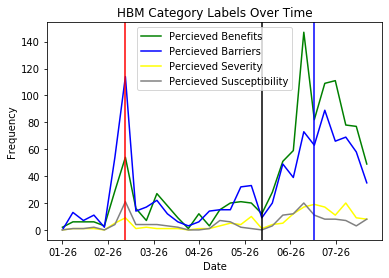

In [54]:
#Plotting the four lines four each category
plt.plot(countBenefitsByWeek.index.week, countBenefitsByWeek, color = 'green')
plt.plot(countBarriersByWeek.index.week, countBarriersByWeek, color = 'blue')
plt.plot(countSeverityByWeek.index.week, countSeverityByWeek, color = 'yellow')
plt.plot(countSusceptibilityByWeek.index.week, countSusceptibilityByWeek, color = 'grey')
#Setting Labels and x ticks
plt.xlabel('Date'); plt.ylabel('Frequency')
plt.xticks(np.arange(min(countBenefitsByWeek.index.week), max(countBenefitsByWeek.index.week), 4.34524),['01-26', '02-26', '03-26','04-26','05-26','06-26','07-26'])
plt.title('HBM Category Labels Over Time')
plt.legend(('Percieved Benefits', 'Percieved Barriers','Percieved Severity','Percieved Susceptibility'))
#Getting the vertical lines for events
WhoNoMask = datetime.datetime(2020, 3, 6)
WhoYesMask = datetime.datetime(2020, 6, 5)
TrumpWearsMask = datetime.datetime(2020,7,12)
xcoords = [int(WhoNoMask.strftime("%V")), int(WhoYesMask.strftime("%V")),int(TrumpWearsMask.strftime("%V"))]
colors = ['r','k','b']
for xc,c in zip(xcoords,colors):
    plt.axvline(x=xc, label='line at x = {}'.format(xc), c=c)
plt.show()